In [44]:
# !pip install pandas
# !pip install numpy
# !pip install statsmodels
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [45]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df.info()
boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Question 1

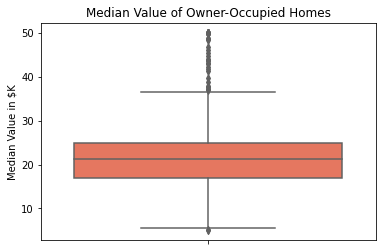

In [46]:
ax = sns.boxplot(y="MEDV", data=boston_df,palette="Reds",linewidth=1.5)
plt.title('Median Value of Owner-Occupied Homes')
plt.ylabel("Median Value in $K")
plt.show()

The Median value of homes is around $22,000

# Question 2

Text(0, 0.5, 'Count of Properties')

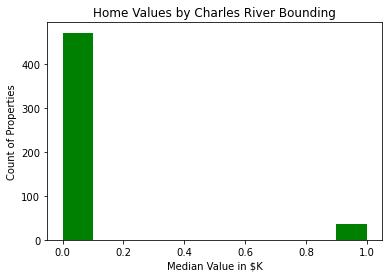

In [47]:
plt.hist(boston_df['CHAS'],facecolor='g')
plt.title('Home Values by Charles River Bounding')
plt.xlabel("Median Value in $K")
plt.ylabel("Count of Properties")

# Question 3

Text(0.5, 0, 'Age Group')

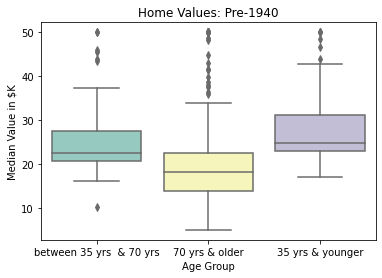

In [48]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 yrs & younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 yrs  & 70 yrs'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 yrs & older'

ax = sns.boxplot(x='Age_Group', y='MEDV', data=boston_df,palette="Set3")
plt.title('Home Values: Pre-1940')
plt.ylabel("Median Value in $K")
plt.xlabel("Age Group")

# Question 4

Text(0.5, 0, 'NOX')

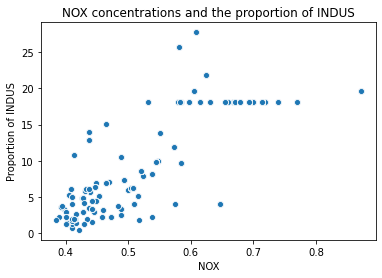

In [49]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('NOX concentrations and the proportion of INDUS')
plt.ylabel("Proportion of INDUS")
plt.xlabel("NOX")

After 0.6 NOX concentration, INDUS 'stablizes' out around ~<20


# Question 5

Text(0, 0.5, 'Count')

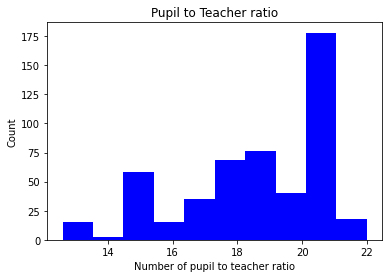

In [50]:
plt.hist(boston_df['PTRATIO'],facecolor='b')
plt.title('Pupil to Teacher ratio')
plt.xlabel("Number of pupil to teacher ratio")
plt.ylabel("Count")

# Question 6
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples,α = 0.05)
## Hypothesis
-   $H_0:$ There is no difference in median values of houses bounded by the Charles River
-   $H_1:$ There is significant difference in the median values of houses bounded by the Charles River

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

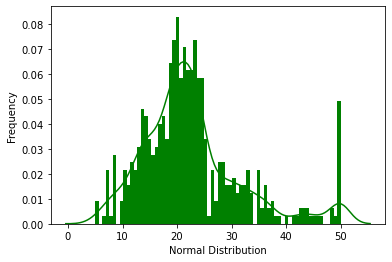

In [51]:
ax = sns.distplot(boston_df['MEDV'],bins=70,kde=True,color='green', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

boston_df = boston_df.astype({"CHAS": object})
boston_df['CHAS'] = boston_df['CHAS'].replace([1],'Yes')
boston_df['CHAS'] = boston_df['CHAS'].replace([0],'No')

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 'Yes']['MEDV'],boston_df[boston_df['CHAS'] == 'No']['MEDV'], equal_var = True, nan_policy = "omit" )

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is a significant difference in the median values of houses bounded by the Charles River

# Question 6
Is there a difference in MEDV for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA,α = 0.05)
## Hypothesis
-   $H_0:$ MEDV for each proportion of owner occupied units built prior to 1940 is the same
-   $H_1:$ There is significant difference in MEDV bounded by the Charles River

In [52]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 yrs & younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 yrs & 70 yrs'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 yrs & older'

MEDV_35 = boston_df[boston_df['Age_Group'] == '35 yrs & younger']['MEDV']
MEDV_35_70 = boston_df[boston_df['Age_Group'] == 'between 35 yrs & 70 yrs']['MEDV']
MEDV_70 = boston_df[boston_df['Age_Group'] == '70 yrs & older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(MEDV_35, MEDV_35_70, MEDV_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is a difference in the MEDV for each proportion of owner occupied units built prior to 1940

# Question 7
Can we conclude that there is no relationship between NO concentrations and proportion of non-retail business acres per town? (Pearson Correlation,α = 0.05)
## Hypothesis
    
-   $H_0:$ NO concentrations is not correlated with proportion of non-retail business acres per town
-   $H_1:$ NO concentrations is correlated with proportion of non-retail business acres per town

(0.763651446920915, 7.913361061239593e-98)

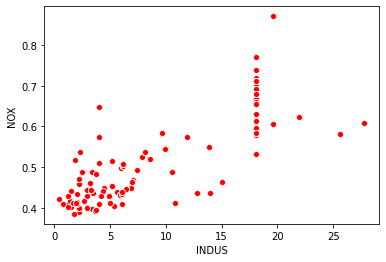

In [53]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df,color='r')
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between NO concentrations and proportion of non-retail business acres per town

# Question 8
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis,α = 0.05)
## Hypothesis
    
-   $H_0:$ Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes
-   $H_1:$ Additional weighted distance to the five Boston employment centres has impact on the median value of owner occupied homes

In [54]:
ind = boston_df['DIS']
dep = boston_df['MEDV']
ind = sm.add_constant(ind) 

model = sm.OLS(dep, ind).fit()
predictions = model.predict(ind)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.21e-08
Time:                        18:09:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**  Since p < 0.05 there is evidence of impact in additional weighted distance to the five Boston employment centres on the median value of owner occupied homes